## NYC KPI DA

LIST OF KPIs
* vehicle hours reduction ($\Delta T_v$)
* travellers utility gains ($\Delta U_p$)
* share of pooling (shared ratio, $S$)
* occupancy ($O$)
* passenger hours increase (pooling detour, $\Delta T_p$)

In [5]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

plt.style.use(['science','no-latex'])

In [6]:
df = pd.read_csv('KPI_resultsNYC.csv', index_col=0)

In [7]:
df.to_csv('KPI_resultsNYC.csv')
df.Start_time = df.apply(lambda row: pd.Timestamp(row.Start_time), axis=1) #convert "Start_time" to time type

In [8]:
df.Start_time = pd.to_datetime(df.Start_time)
df.End_time = pd.to_datetime(df.End_time)

In [55]:
df['del_VehHourTrav']=(df['VehHourTrav_ns']-df['VehHourTrav'])/df['VehHourTrav'] #KPI1: vehicle hours reduction
df['del_PassUtility']=abs((df['PassUtility_ns']-df['PassUtility'])/df['PassUtility']) #KPI2:travellers utility gains
df['Occupancy']=df['PassHourTrav']/df['VehHourTrav'] #KPI4:occupancy
df['del_PassHourTrav']=abs((df['PassHourTrav_ns']-df['PassHourTrav'])/df['PassHourTrav']) #KPI5:passenger hours increase

In [13]:
df.Start_time = df.apply(lambda row: pd.Timestamp(row.Start_time), axis=1)

> **THE CRITICAL MASS**

Text(0.5, 0, 'Demand')

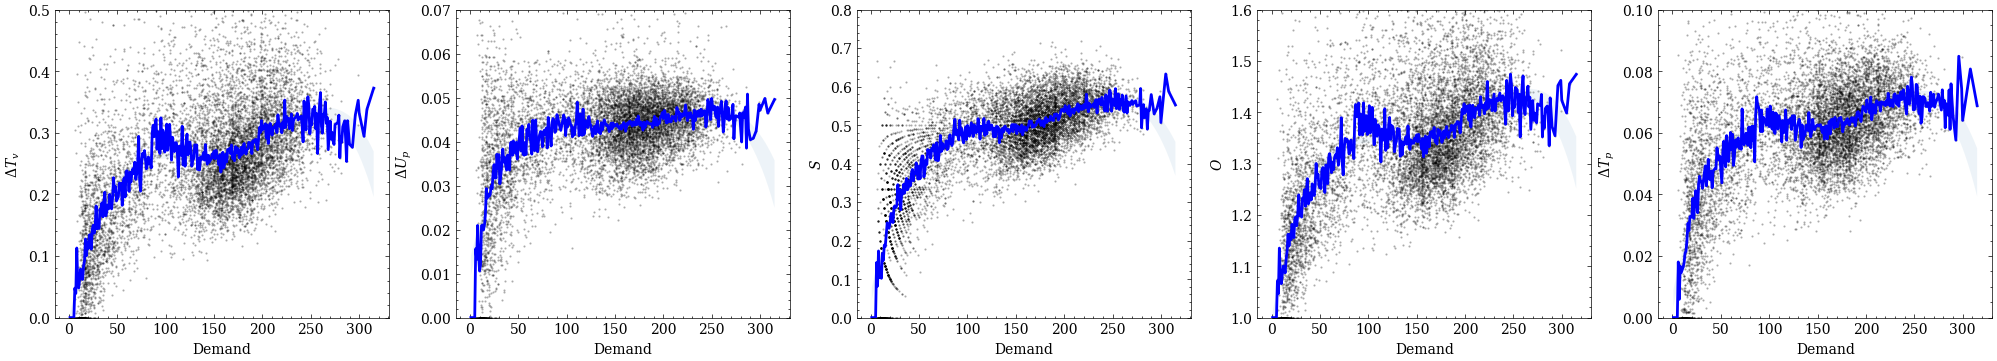

In [134]:
fig, axes = plt.subplots(1,5, figsize = (25,4))
axes = axes.flatten()

ax=axes[0]
to_plot = df
sns.regplot(data = to_plot, x = 'Demand_size', y = 'del_VehHourTrav', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df.groupby(df.Demand_size).del_VehHourTrav.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((0,0.5))
ax.set_ylabel("$\Delta T_v$")
ax.set_xlabel("Demand")

ax=axes[1]
to_plot = df
sns.regplot(data = to_plot, x = 'Demand_size', y = 'del_PassUtility', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df.groupby(df.Demand_size).del_PassUtility.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((0,0.07))
ax.set_ylabel("$\Delta U_p$")
ax.set_xlabel("Demand")

ax=axes[2]
to_plot = df
sns.regplot(data = to_plot, x = 'Demand_size', y = 'shared_ratio', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df.groupby(df.Demand_size).shared_ratio.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((0,0.8))
ax.set_ylabel("$S$")
ax.set_xlabel("Demand")

ax=axes[3]
to_plot = df
sns.regplot(data = to_plot, x = 'Demand_size', y = 'Occupancy', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df.groupby(df.Demand_size).Occupancy.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((1,1.6))
ax.set_ylabel("$O$")
ax.set_xlabel("Demand")

ax=axes[4]
to_plot = df
sns.regplot(data = to_plot, x = 'Demand_size', y = 'del_PassHourTrav', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df.groupby(df.Demand_size).del_PassHourTrav.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((0,0.1))
ax.set_ylabel("$\Delta T_p$")
ax.set_xlabel("Demand")

> **KPI DISTRIBUTION with standard deviation**

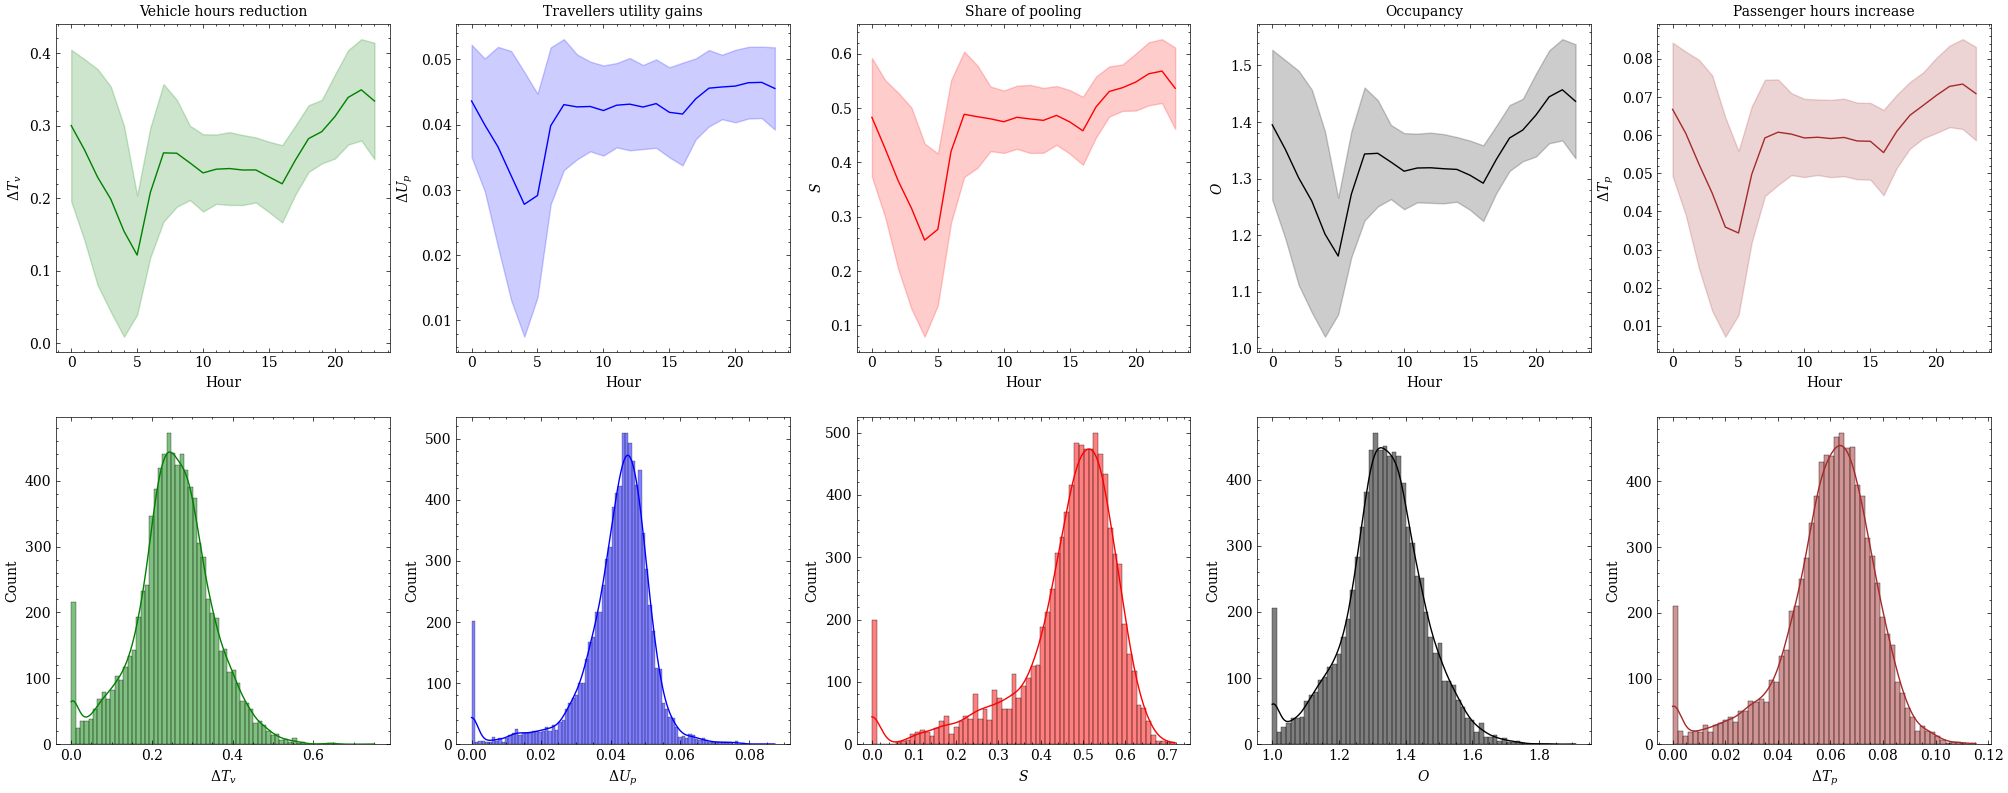

In [186]:

# Setup the subplot2grid Layout
fig = plt.figure(figsize=(18, 9))
ax1 = plt.subplot2grid((2,5), (0,0)) # Vehicle hours reduction with standard deviation
ax2 = plt.subplot2grid((2,5), (0,1)) # Travellers utility gains with standard deviation
ax3 = plt.subplot2grid((2,5), (0,2)) # Share of pooling with standard deviation
ax4 = plt.subplot2grid((2,5), (0,3)) # Occupancy with standard deviation
ax5 = plt.subplot2grid((2,5), (0,4)) # Passenger hours increase with standard deviation
ax6 = plt.subplot2grid((2,5), (1,0)) 
ax7 = plt.subplot2grid((2,5), (1,1)) 
ax8 = plt.subplot2grid((2,5), (1,2)) 
ax9 = plt.subplot2grid((2,5), (1,3)) 
ax10 = plt.subplot2grid((2,5), (1,4)) 

ax=ax1
for d in df.shared_discount.unique():
    to_plot = df
    sns.lineplot(data = to_plot, x = df.Start_time.dt.hour, y = 'del_VehHourTrav', ax = ax, color='green', errorbar ='sd')
ax1.set_xlabel('Hour')
ax1.set_ylabel("$\Delta T_v$")
ax1.set_title("Vehicle hours reduction", fontsize=10)

ax=ax2
for d in df.shared_discount.unique():
    to_plot = df
    sns.lineplot(data = to_plot, x = df.Start_time.dt.hour, y = 'del_PassUtility', ax = ax, color='blue', errorbar ='sd')
ax2.set_xlabel('Hour')
ax2.set_ylabel("$\Delta U_p$")
ax2.set_title("Travellers utility gains", fontsize=10)

ax=ax3
for d in df.shared_discount.unique():
    to_plot = df
    sns.lineplot(data = to_plot, x = df.Start_time.dt.hour, y = 'shared_ratio', ax = ax, color='red', errorbar ='sd')
ax3.set_xlabel('Hour')
ax3.set_ylabel("$S$")
ax3.set_title("Share of pooling", fontsize=10)

ax=ax4
for d in df.shared_discount.unique():
    to_plot = df
    sns.lineplot(data = to_plot, x = df.Start_time.dt.hour, y = 'Occupancy', ax = ax, color='black', errorbar ='sd')
ax4.set_xlabel('Hour')
ax4.set_ylabel("$O$")
ax4.set_title("Occupancy", fontsize=10)

ax=ax5
for d in df.shared_discount.unique():
    to_plot = df
    sns.lineplot(data = to_plot, x = df.Start_time.dt.hour, y = 'del_PassHourTrav', ax = ax, color='brown', errorbar ='sd')
ax5.set_xlabel('Hour')
ax5.set_ylabel("$\Delta T_p$")
ax5.set_title("Passenger hours increase", fontsize=10)

ax=ax6 # with kernel density estimation
for d in df.shared_discount.unique():
    to_plot = df
sns.histplot(data = to_plot, x = 'del_VehHourTrav', kde=True, color='green', ax=ax)
to_plot.Start_time.dt.dayofweek.unique()
ax6.set_xlabel("$\Delta T_v$")

ax=ax7 # with kernel density estimation
for d in df.shared_discount.unique():
    to_plot = df
sns.histplot(data = to_plot, x = 'del_PassUtility', kde=True, color='blue', ax=ax)
to_plot.Start_time.dt.dayofweek.unique()
ax7.set_xlabel("$\Delta U_p$")

ax=ax8 # with kernel density estimation
for d in df.shared_discount.unique():
    to_plot = df
sns.histplot(data = to_plot, x = 'shared_ratio', kde=True, color='red', ax=ax)
to_plot.Start_time.dt.dayofweek.unique()
ax8.set_xlabel("$S$")

ax=ax9 # with kernel density estimation
for d in df.shared_discount.unique():
    to_plot = df
sns.histplot(data = to_plot, x = 'Occupancy', kde=True, color='black', ax=ax)
to_plot.Start_time.dt.dayofweek.unique()
ax9.set_xlabel("$O$")

ax=ax10 # with kernel density estimation
for d in df.shared_discount.unique():
    to_plot = df
sns.histplot(data = to_plot, x = 'del_PassHourTrav', kde=True, color='brown', ax=ax)
to_plot.Start_time.dt.dayofweek.unique()
ax10.set_xlabel("$\Delta T_p$")
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)


> **Sensitivity of KPI to weekends/working days at different times of the day** 


      using the Vehicle Hours Reduction indicator as an example

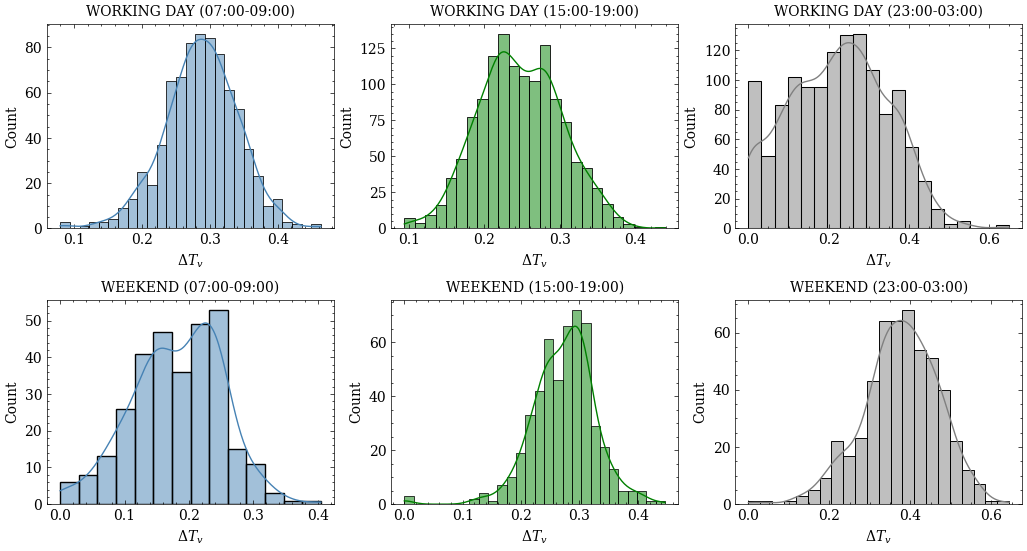

In [180]:
# Setup the subplot2grid Layout
fig = plt.figure(figsize=(10, 6))
ax1 = plt.subplot2grid((2,3), (0,0)) 
ax2 = plt.subplot2grid((2,3), (0,1)) 
ax3 = plt.subplot2grid((2,3), (0,2)) 
ax4 = plt.subplot2grid((2,3), (1,0)) 
ax5 = plt.subplot2grid((2,3), (1,1)) 
ax6 = plt.subplot2grid((2,3), (1,2)) 


ax=ax1
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4]) 
                  & (df.Start_time.dt.hour.isin([7,8,9])))]
sns.histplot(data = to_plot, x = 'del_VehHourTrav', kde=True, color='steelblue', ax=ax)
to_plot.Start_time.dt.dayofweek.unique()
ax1.set_xlabel("$\Delta T_v$")
ax.set_title("WORKING DAY (07:00-09:00)", fontsize=10)


ax=ax2
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4]) 
                  & (df.Start_time.dt.hour.isin([15,16,17,18,19])))]
sns.histplot(data = to_plot, x = 'del_VehHourTrav', kde=True, color='green', ax=ax)
to_plot.Start_time.dt.dayofweek.unique()
ax2.set_xlabel("$\Delta T_v$")
ax.set_title("WORKING DAY (15:00-19:00)", fontsize=10)


ax=ax3
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4]) 
                  & (df.Start_time.dt.hour.isin([23]))) 
                 | df.Start_time.dt.dayofweek.isin([0,1,2,3,4]) 
                  & (df.Start_time.dt.hour.isin([0,1,2,3]))]
sns.histplot(data = to_plot, x = 'del_VehHourTrav', kde=True, color='gray', ax=ax)
to_plot.Start_time.dt.dayofweek.unique()
ax3.set_xlabel("$\Delta T_v$")
ax.set_title("WORKING DAY (23:00-03:00)", fontsize=10)

ax=ax4
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6]) 
                  & (df.Start_time.dt.hour.isin([7,8,9])))]
sns.histplot(data = to_plot, x = 'del_VehHourTrav', kde=True, color='steelblue', ax=ax)
to_plot.Start_time.dt.dayofweek.unique()
ax4.set_xlabel("$\Delta T_v$")
ax.set_title("WEEKEND (07:00-09:00)", fontsize=10)

ax=ax5
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6]) 
                  & (df.Start_time.dt.hour.isin([15,16,17,18,19])))]
sns.histplot(data = to_plot, x = 'del_VehHourTrav', kde=True, color='green', ax=ax)
to_plot.Start_time.dt.dayofweek.unique()
ax5.set_xlabel("$\Delta T_v$")
ax.set_title("WEEKEND (15:00-19:00)", fontsize=10)

ax=ax6
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6]) 
                  & (df.Start_time.dt.hour.isin([23]))) 
                 | df.Start_time.dt.dayofweek.isin([5,6]) 
                  & (df.Start_time.dt.hour.isin([0,1,2,3]))]
sns.histplot(data = to_plot, x = 'del_VehHourTrav', kde=True, color='gray', ax=ax)
to_plot.Start_time.dt.dayofweek.unique()
ax6.set_xlabel("$\Delta T_v$")
ax.set_title("WEEKEND (23:00-03:00)", fontsize=10)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.1, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

> **Sensitivity of KPI to discount** 


      using the OCCUPANCY indicator as an example

In [66]:
df1 = pd.read_csv('df.csv', index_col=0)

In [67]:
df1.to_csv('df.csv')
df1.Start_time = df1.apply(lambda row: pd.Timestamp(row.Start_time), axis=1) #convert "Start_time" to time type

In [188]:
df1.Start_time = pd.to_datetime(df1.Start_time)
df1.End_time = pd.to_datetime(df1.End_time)

In [189]:
df1['del_VehHourTrav']=(df1['VehHourTrav_ns']-df1['VehHourTrav'])/df1['VehHourTrav'] #KPI1: vehicle hours reduction
df1['del_PassUtility']=abs((df1['PassUtility_ns']-df1['PassUtility'])/df1['PassUtility']) #KPI2:travellers utility gains
df1['Occupancy']=df1['PassHourTrav']/df1['VehHourTrav'] #KPI4:occupancy
df1['del_PassHourTrav']=abs((df1['PassHourTrav_ns']-df1['PassHourTrav'])/df1['PassHourTrav']) #KPI5:passenger hours increase

In [190]:
df1.Start_time = df1.apply(lambda row: pd.Timestamp(row.Start_time), axis=1)

array([4, 0, 1, 2, 3], dtype=int64)

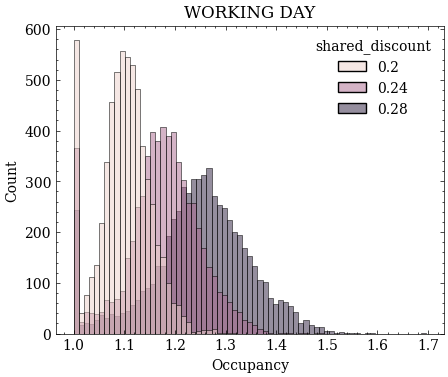

In [191]:
to_plot = df1[(df1.Start_time.dt.dayofweek.isin([0,1,2,3,4]))] 
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('WORKING DAY')
sns.histplot(data = to_plot, x = 'Occupancy', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

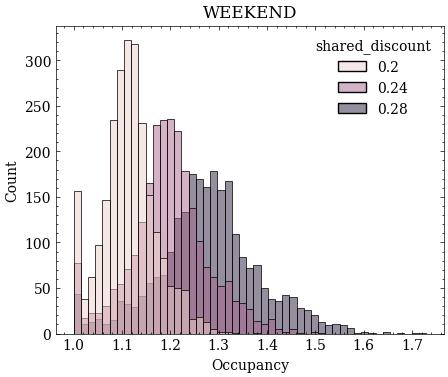

In [192]:
to_plot = df1[(df1.Start_time.dt.dayofweek.isin([5,6]))] 
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('WEEKEND')
sns.histplot(data = to_plot, x = 'Occupancy', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

Text(0.5, 1.0, 'WORKING DAY')

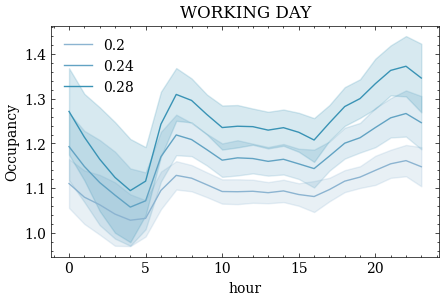

In [197]:
fig, ax = plt.subplots(figsize = (5,3))
df1['hour'] = df1.Start_time.dt.hour
for d in df1.shared_discount.unique():
    to_plot = df1[(df1.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df1.shared_discount == d)]
    sns.lineplot(data = to_plot, x = 'hour', y = 'Occupancy', ax = ax, label = d, errorbar ='sd', linewidth=1.0)
    plt.legend()
    plt.ylabel("Occupancy")
plt.title("WORKING DAY")

Text(0.5, 1.0, 'WEEKEND')

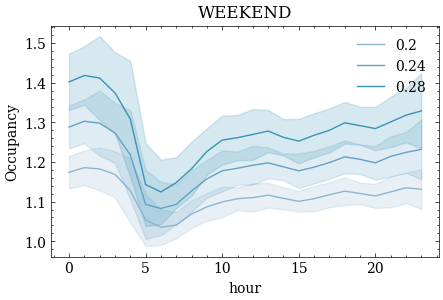

In [88]:
fig, ax = plt.subplots(figsize = (5,3))
df1['hour'] = df1.Start_time.dt.hour
for d in df1.shared_discount.unique():
    to_plot = df1[(df1.Start_time.dt.dayofweek.isin([5,6])) & (df1.shared_discount == d)]
    sns.lineplot(data = to_plot, x = 'hour', y = 'Occupancy', ax = ax, label = d, errorbar ='sd')
plt.legend()
plt.ylabel("Occupancy")
plt.title("WEEKEND")